In [5]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
sys.path.append(os.path.abspath("../..")) 
from src.training.train import train_autoencoder, train_cellfate
from sklearn.model_selection import train_test_split
from src.models.classifier import mlp_classifier
import tensorflow as tf
from src.evaluation.evaluate import shapiro_wilk_test, plot_qq_plots
from sklearn.metrics import confusion_matrix
from src.preprocessing.preprocessing_functions import augment_dataset, augmentations

## Load DISCOVER results (fate predictions)

In [11]:
y_test = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/y_test.npy")

## Load trained DISCOVER results

y_pred_discover42 = np.load("/Users/inescunha/Desktop/AI4CellFate/DISCOVER_results/test_z_scores_42.npy")
y_pred_discover43 = np.load("/Users/inescunha/Desktop/AI4CellFate/DISCOVER_results/test_z_scores_43.npy")
y_pred_discover44 = np.load("/Users/inescunha/Desktop/AI4CellFate/DISCOVER_results/test_z_scores_44.npy")

y_pred_discover42_classes = (y_pred_discover42>0.5).astype("int32")
y_pred_discover43_classes = (y_pred_discover43>0.5).astype("int32")
y_pred_discover44_classes = (y_pred_discover44>0.5).astype("int32")

cm_discover42 = confusion_matrix(y_test, y_pred_discover42_classes)
cm_discover_norm_42 = cm_discover42/cm_discover42.sum(axis=1, keepdims=True)
cm_discover43 = confusion_matrix(y_test, y_pred_discover43_classes)
cm_discover_norm_43 = cm_discover43/cm_discover43.sum(axis=1, keepdims=True)
cm_discover44= confusion_matrix(y_test, y_pred_discover44_classes)
cm_discover_norm_44 = cm_discover44/cm_discover44.sum(axis=1, keepdims=True)

confusion_matrices_discover = np.stack([cm_discover_norm_42, cm_discover_norm_43, cm_discover_norm_44], axis=0)

In [12]:
confusion_matrices_discover

array([[[0.21551724, 0.78448276],
        [0.2       , 0.8       ]],

       [[0.38793103, 0.61206897],
        [0.22222222, 0.77777778]],

       [[0.26293103, 0.73706897],
        [0.35555556, 0.64444444]]])

In [13]:
precision_discover = np.zeros((confusion_matrices_discover.shape[0]))
accuracy_discover = np.zeros((confusion_matrices_discover.shape[0]))
false_positives_discover = np.zeros((confusion_matrices_discover.shape[0]))
false_negatives_discover = np.zeros((confusion_matrices_discover.shape[0]))

for size in range(confusion_matrices_discover.shape[0]):
    conf_matrix = confusion_matrices_discover[size]
    precision_discover[size] = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[1,0])
    accuracy_discover[size] = (conf_matrix[0,0] + conf_matrix[1,1]) / np.sum(conf_matrix)
    false_positives_discover[size] = conf_matrix[1,0] #/ np.sum(conf_matrix[1,:])
    false_negatives_discover[size] = conf_matrix[0,1] #/ np.sum(conf_matrix[0,:])

In [23]:
latent_space = np.load("/Users/inescunha/Desktop/AI4CellFate/DISCOVER_results/train_latent_space_42.npy")
augmented_x_train = np.load('../../data/final_split/augmented_x_train.npy')
augmented_y_train = np.load('../../data/final_split/augmented_y_train.npy')

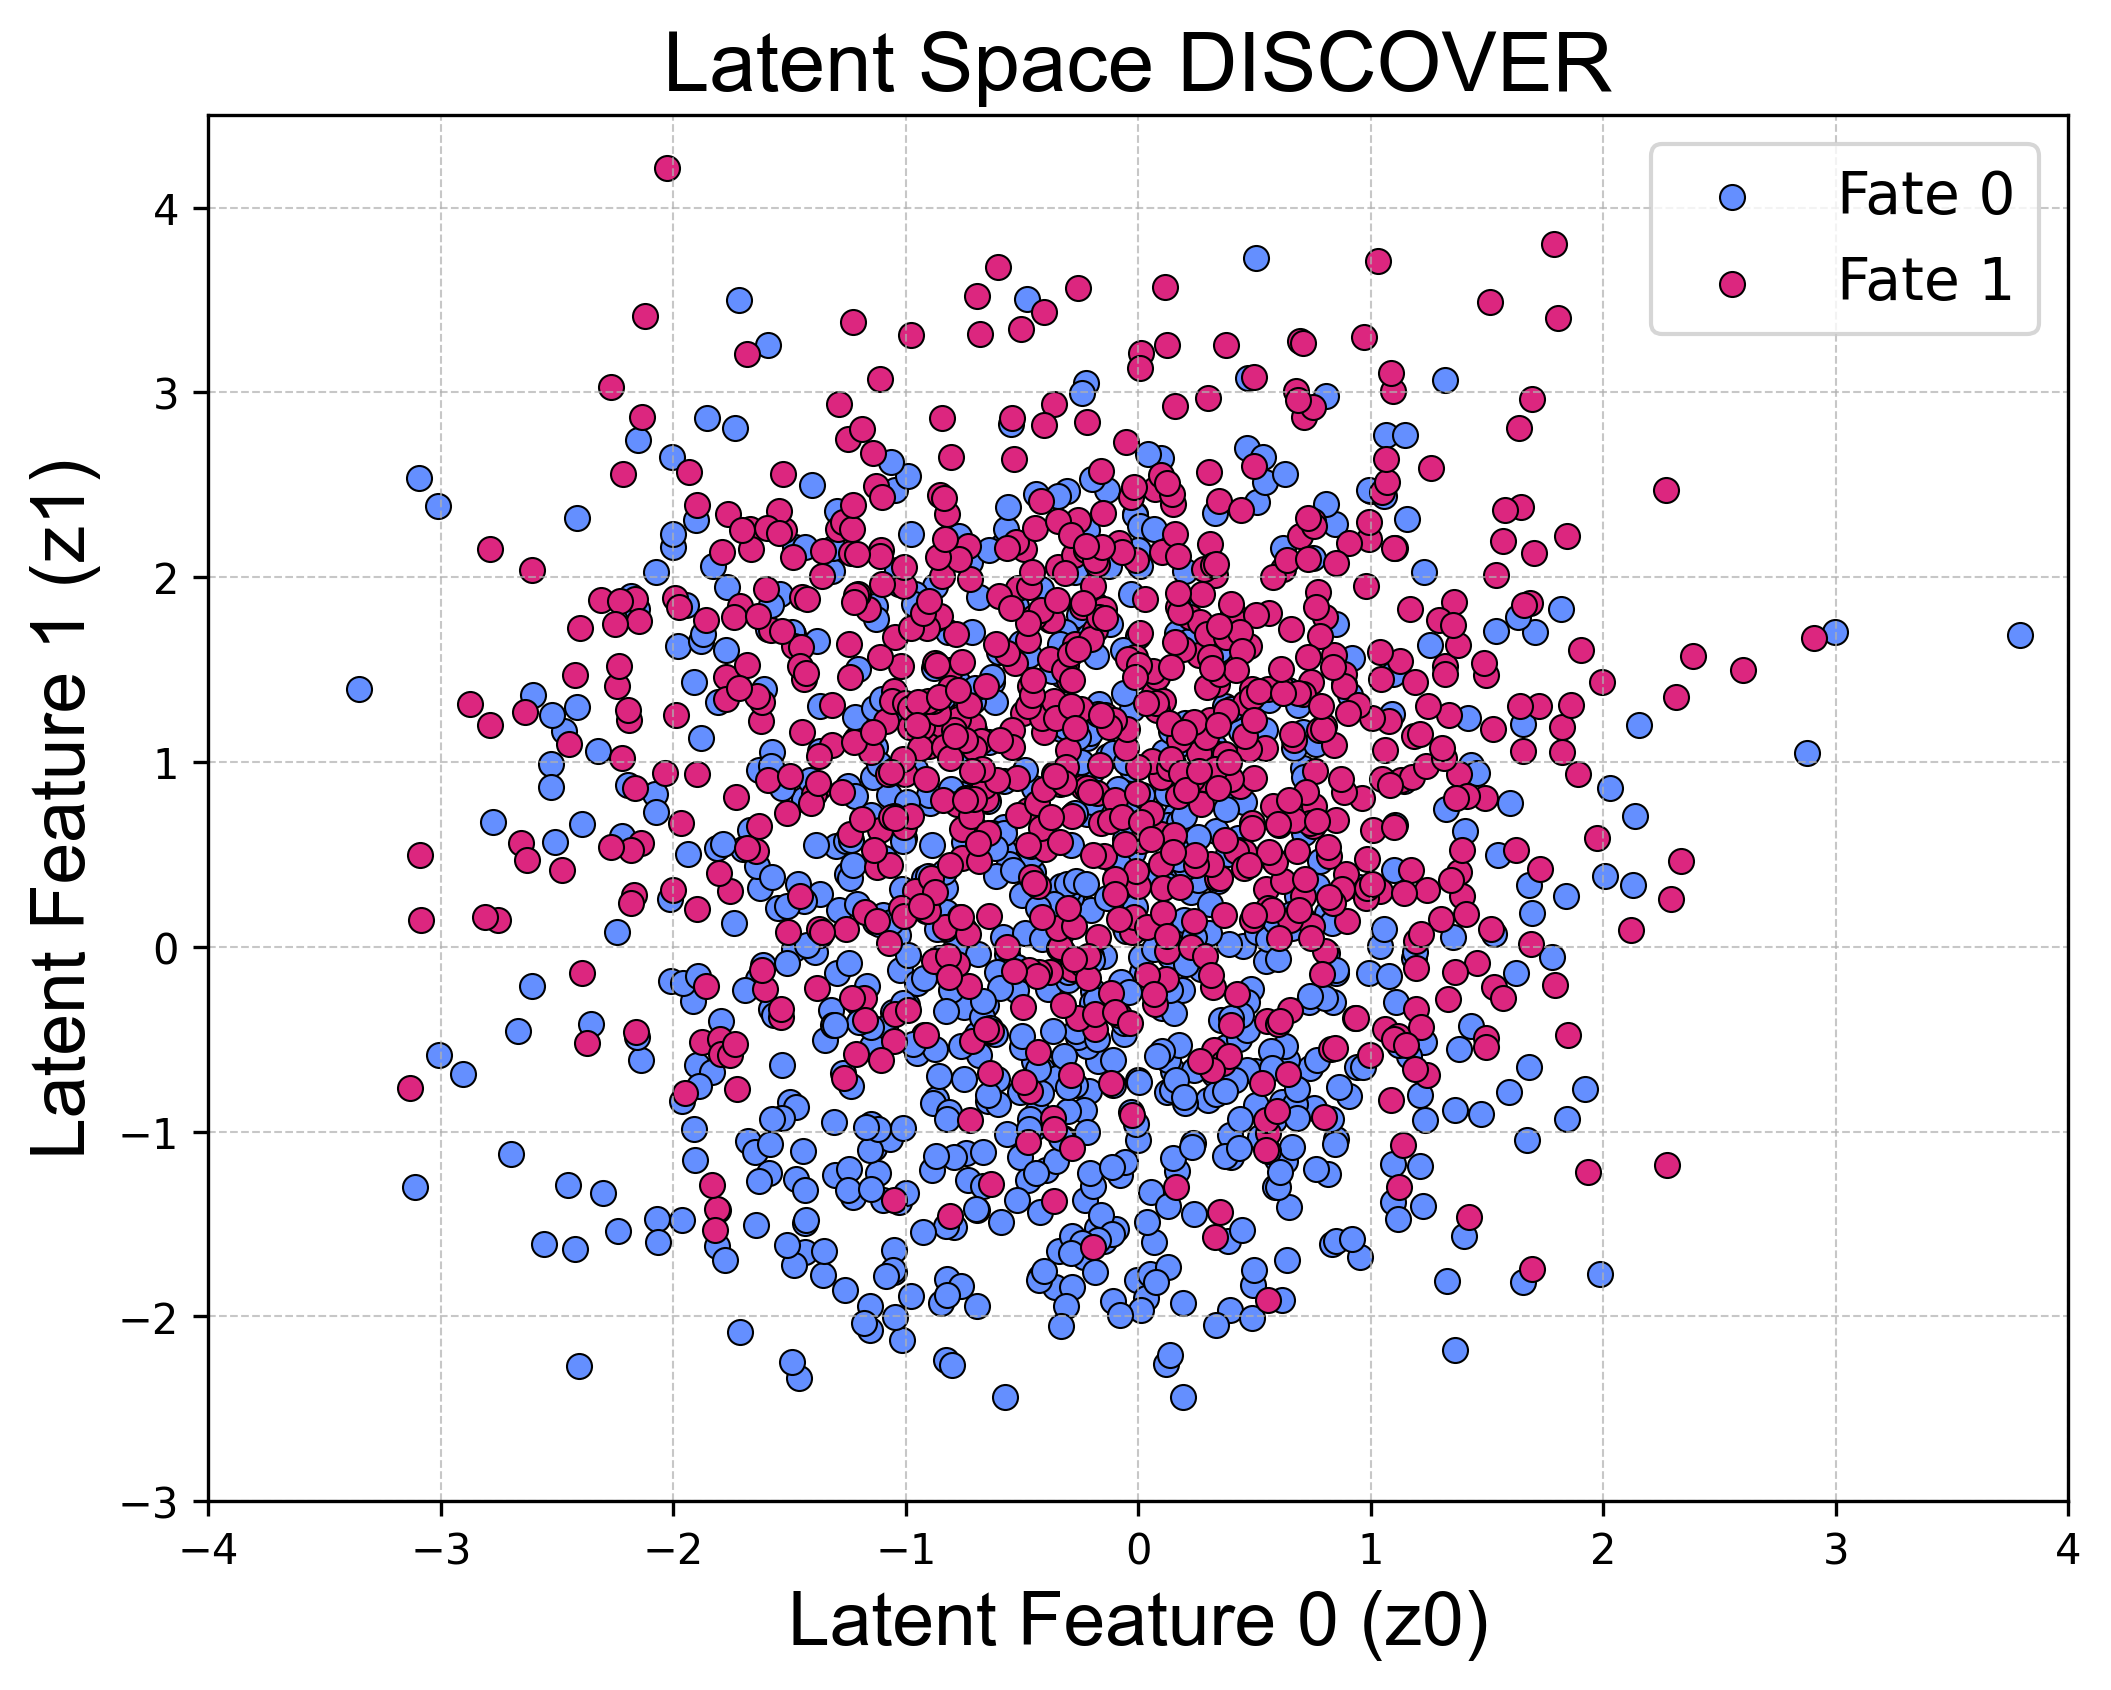

In [29]:
# Predict the latent representations
latent_2d = latent_space

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[augmented_y_train == 0][:, 0], latent_2d[augmented_y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[augmented_y_train == 1][:, 0], latent_2d[augmented_y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-4, 4)
plt.ylim(-3, 4.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space DISCOVER", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("rasterised_ls_cellfate.eps", dpi=600, bbox_inches="tight")
plt.show()

## Comparing ALL results

In [ ]:
## AI4CellFate

ai4cellfate_seed42 = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/results/s1_ep35_lr5_la1_seed42_ldim2_s2_lr6_la4_lc1_lcon8/confusion_matrix_values_epoch_52.npy")
ai4cellfate_seed44 = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/results/s1_ep35_lr5_la1_seed48_ldim2_s2_lr6_la4_lc1_lcon8/confusion_matrix_values_epoch_53.npy")
ai4cellfate_seed46 = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/results/s1_ep35_lr5_la1_seed46_ldim2_s2_lr6_la4_lc1_lcon8/confusion_matrix_values_epoch_50.npy")

conf_matrix_ai4cellfate = np.stack([ai4cellfate_seed42, ai4cellfate_seed44, ai4cellfate_seed46], axis=0)

## ImageNet

imagenet_seed42 = np.load("imagenet_conf_matrix_seed42.npy")
imagenet_seed44 = np.load("imagenet_conf_matrix_seed44.npy")
imagenet_seed46 = np.load("imagenet_conf_matrix_seed46.npy")

conf_matrix_imagenet = np.stack([imagenet_seed42, imagenet_seed44, imagenet_seed46], axis=0)

## Tabular
conf_matrix_tabular = np.load("conf_matrix_tabular_13_features.npy")

In [33]:
accuracy_tabular = np.zeros((conf_matrix_tabular.shape[0]))
accuracy_ai4cellfate = np.zeros((conf_matrix_ai4cellfate.shape[0]))
accuracy_imagenet = np.zeros((conf_matrix_imagenet.shape[0]))
accuracy_discover = np.zeros((confusion_matrices_discover.shape[0]))

for seed in range(conf_matrix_tabular.shape[0]):
    conf_matrix = conf_matrix_tabular[seed]
    accuracy_tabular[seed] = (conf_matrix[0,0] + conf_matrix[1,1]) / np.sum(conf_matrix)
    accuracy_ai4cellfate[seed] = (conf_matrix_ai4cellfate[seed][0,0] + conf_matrix_ai4cellfate[seed][1,1]) / np.sum(conf_matrix_ai4cellfate[seed])
    accuracy_imagenet[seed] = (conf_matrix_imagenet[seed][0,0] + conf_matrix_imagenet[seed][1,1]) / np.sum(conf_matrix_imagenet[seed])
    accuracy_discover[seed] = (confusion_matrices_discover[seed][0,0] + confusion_matrices_discover[seed][1,1]) / np.sum(confusion_matrices_discover[seed])

In [35]:
print("Accuracy ImageNet: ", accuracy_imagenet)
print("Accuracy AI4CellFate: ", accuracy_ai4cellfate)
print("Accuracy Tabular: ", accuracy_tabular)
print("Accuracy Discover: ", accuracy_discover)

Accuracy ImageNet:  [0.61034483 0.64631226 0.62725096]
Accuracy AI4CellFate:  [0.72159962 0.71829502 0.71331418]
Accuracy Tabular:  [0.65306795 0.68346509 0.65302089]
Accuracy Discover:  [0.50775862 0.58285441 0.45368774]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

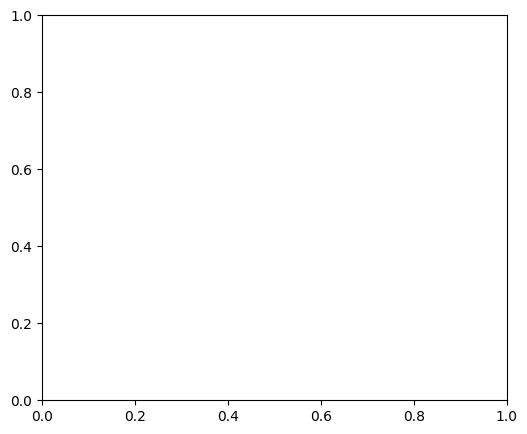

In [ ]:
# means_precision = [precision_tabular.mean(), precision_ai4cellfate.mean()]
# std_precision = [precision_tabular.std(), precision_ai4cellfate.std()]
means_accuracy = [accuracy_ai4cellfate.mean(), accuracy_tabular.mean(), accuracy_imagenet.mean(), accuracy_discover.mean()]
std_accuracy = [accuracy_ai4cellfate.std(), accuracy_tabular.std(), accuracy_imagenet.std(), accuracy_discover.std()]


### TODO: PLOT THE BAR PLOTS
# X positions for bars (closer together)
x = np.array([0, 0.8])  # Precision bars
x2 = x + 2.0  # Accuracy bars (closer spacing)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))

# Define bar width
bar_width = 0.7

# Bar plots with error bars
#ax.bar(x, means_precision, yerr=std_precision, capsize=6, color=["orange", "turquoise"], edgecolor='black', width=bar_width, label="Precision")
ax.bar(x2, means_accuracy, yerr=std_accuracy, capsize=6, color=["orange", "turquoise", "blue", "green"], edgecolor='black', width=bar_width, label="Accuracy")

# X-axis labels centered
ax.set_xticks([0.4])  
ax.set_xticklabels(["Accuracy"], fontsize=16, fontname='Arial')

# Y-axis label
ax.set_ylabel("Score", fontsize=18, fontname='Arial')

# Y-axis ticks (bigger font)
ax.tick_params(axis='y', labelsize=18)

# Title
ax.set_title("Performance Comparison", fontsize=18, fontname='Arial')

# Legend (top right with correct colors)
legend_labels = ["Tabular Features", "Latent Features"]
legend_colors = ["orange"]
legend_patches = [plt.Rectangle((0,0),1,1, color=color, edgecolor='black') for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc="upper right", fontsize=14)

# Set y-axis limit
ax.set_ylim(0.5, 0.8)

plt.xticks(fontsize=18, fontname="Arial")
plt.yticks(fontsize=18, fontname="Arial")

# Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
#plt.savefig("barplot_all_feat_comparison.eps", dpi=300, bbox_inches="tight")
plt.show()

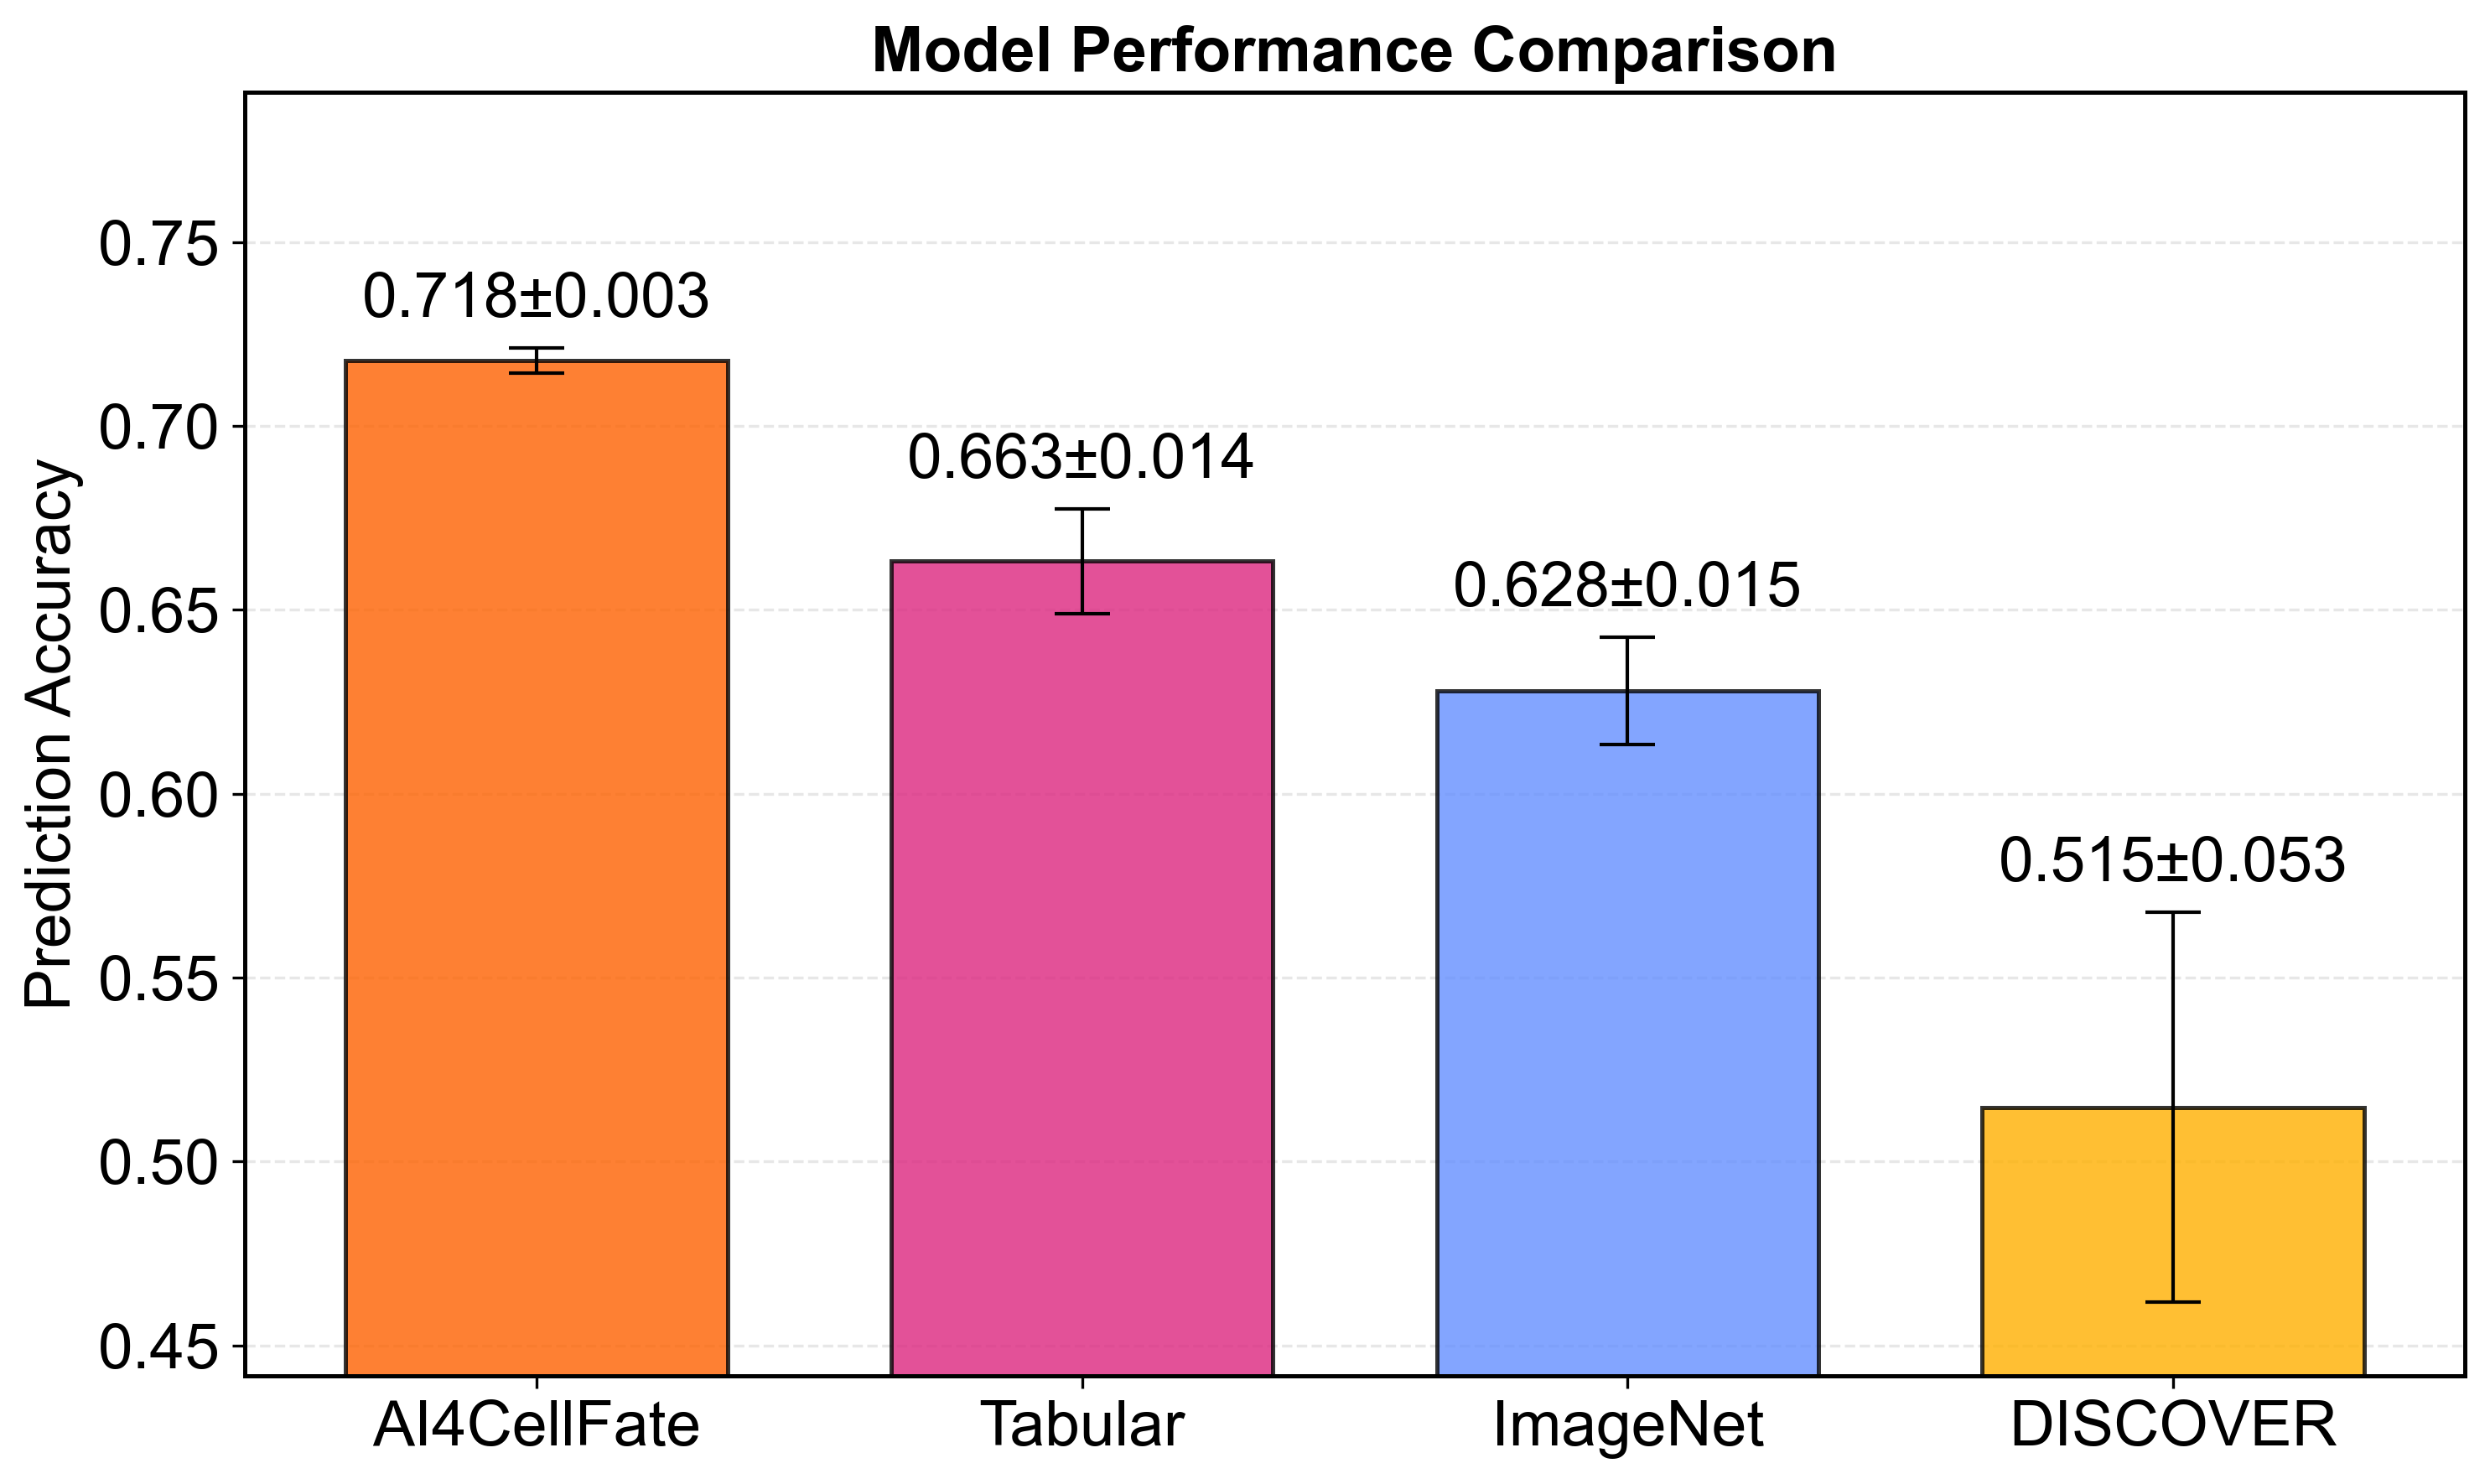

📊 Model Performance Summary:
AI4CellFate : 0.7177 ± 0.0034
Tabular     : 0.6632 ± 0.0143
ImageNet    : 0.6280 ± 0.0147
DISCOVER    : 0.5148 ± 0.0530


In [69]:
# Create a beautiful bar plot comparing the 4 models
import matplotlib.pyplot as plt
import numpy as np

# Your data (already calculated)
model_names = ['AI4CellFate', 'Tabular', 'ImageNet', 'DISCOVER']
means_accuracy = [accuracy_ai4cellfate.mean(), accuracy_tabular.mean(), accuracy_imagenet.mean(), accuracy_discover.mean()]
std_accuracy = [accuracy_ai4cellfate.std(), accuracy_tabular.std(), accuracy_imagenet.std(), accuracy_discover.std()]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Define colors for each model
#colors = ['turquoise', 'orange', 'purple', 'magenta']  
colors = ['#FE6100', '#DC267F', '#648FFF', '#FFB000']

# Create bars with error bars
bars = ax.bar(model_names, means_accuracy, yerr=std_accuracy, 
              capsize=8,  
               width=0.7,
              color=colors, alpha=0.8, 
              edgecolor='black', linewidth=1.2,
              error_kw={'elinewidth': 1, 'ecolor': 'black', 'capthick': 1})  # capthick goes in error_kw

# Customize the plot
ax.set_ylabel('Prediction Accuracy', fontsize=18, fontweight='light', fontname='Arial')
ax.set_title('Model Performance Comparison', fontsize=18, fontweight='bold', fontname='Arial')

# Set y-axis limits to better show differences
y_min = min(means_accuracy) - max(std_accuracy) - 0.02
y_max = max(means_accuracy) + max(std_accuracy) + 0.02
ax.set_ylim(y_min, y_max)

# Add value labels on top of bars
for i, (bar, mean, std) in enumerate(zip(bars, means_accuracy, std_accuracy)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + std + 0.005,
            f'{mean:.3f}±{std:.3f}',
            ha='center', va='bottom', fontsize=18, fontweight='light', fontname='Arial')

# Customize grid and spines
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
for spine in ax.spines.values():
    spine.set_linewidth(1.2)

# Rotate x-axis labels if needed and increase font size
ax.tick_params(axis='x', labelsize=18, labelrotation=0)
ax.tick_params(axis='y', labelsize=18)

# Set font for tick labels
for label in ax.get_xticklabels():
    label.set_fontname('Arial')
for label in ax.get_yticklabels():
    label.set_fontname('Arial')

plt.tight_layout()
plt.show()

# Print summary statistics
print("📊 Model Performance Summary:")
print("=" * 50)
for name, mean, std in zip(model_names, means_accuracy, std_accuracy):
    print(f"{name:12s}: {mean:.4f} ± {std:.4f}")